# ACRO Tests

In [1]:
import os
import sys
import pandas as pd
import numpy as np

In [2]:
# uncomment this line if acro is not installed
# ie you are in development mode
# sys.path.insert(0, os.path.abspath(".."))

In [3]:
from acro import ACRO, acro_tables, add_constant, utils

### Instantiate ACRO

In [4]:
acro = ACRO(suppress=False)

INFO:acro:version: 0.4.3
INFO:acro:config: {'safe_threshold': 10, 'safe_dof_threshold': 10, 'safe_nk_n': 2, 'safe_nk_k': 0.9, 'safe_pratio_p': 0.1, 'check_missing_values': False, 'survival_safe_threshold': 10, 'zeros_are_disclosive': True}
INFO:acro:automatic suppression: False


### Load test data

In [5]:
path = os.path.join("../data", "test_data.dta")
df = pd.read_stata(path)
df.head()

,charity,grant_type,index,year,inc_activity,inc_grants,inc_donations,inc_other,inc_total,total_costs,...,sh_staff_grants_given,sh_assets_grants_given,sh_income_balance,sh_staff_balance,sh_assets_balance,sh_income_assets,sh_staff_assets,sh_income_staff_costs,sh_assets_staff_costs,wgt
0,4Children,R,1.0,2011,2880902.0,9603182.0,91404.0,310947.0,12886435.0,12127472.0,...,NaN,NaN,0.072636,0.135971,0.767809,0.094602,0.177090,0.534203,5.646843,1.0
1,4Children,R,1.0,2014,6810520.0,18768904.0,58002.0,401879.0,26039304.0,25493796.0,...,NaN,NaN,0.057641,0.089150,1.001396,0.057560,0.089026,0.646561,11.232729,1.0
2,4Children,R,1.0,2015,7199403.0,21638036.0,132191.0,512654.0,29482284.0,32290108.0,...,NaN,NaN,-0.049619,-0.079828,-0.620210,0.080004,0.128711,0.621583,7.769365,1.0
3,4Children,R,1.0,2013,5573013.0,15194731.0,228844.0,267156.0,21263744.0,20989048.0,...,NaN,NaN,0.045740,0.068251,1.008259,0.045365,0.067692,0.670166,14.772749,1.0
4,4Children,R,1.0,2010,2056816.0,7335103.0,110256.0,424628.0,9926803.0,9769816.0,...,NaN,NaN,0.057696,0.122532,0.567539,0.101660,0.215901,0.470862,4.631749,1.0


### Pandas crosstab

In [6]:
table = pd.crosstab(df.year, df.grant_type)
table

grant_type,G,N,R,R/G
year,,,,
2010,15,59,71,8
2011,15,59,71,8
2012,15,59,71,8
2013,15,59,71,8
2014,15,59,71,8
2015,15,59,71,8


### ACRO crosstab

In [7]:
safe_table = acro.crosstab(df.year, df.grant_type)
safe_table

INFO:acro:get_summary(): fail; threshold: 6 cells may need suppressing; 
INFO:acro:outcome_df:
---------------------------------------|
grant_type |G   |N   |R   |R/G         |
year       |    |    |    |            |
---------------------------------------|
2010       | ok | ok | ok | threshold; |
2011       | ok | ok | ok | threshold; |
2012       | ok | ok | ok | threshold; |
2013       | ok | ok | ok | threshold; |
2014       | ok | ok | ok | threshold; |
2015       | ok | ok | ok | threshold; |
---------------------------------------|

INFO:acro:records:add(): output_0


grant_type,G,N,R,R/G
year,,,,
2010,15,59,71,8
2011,15,59,71,8
2012,15,59,71,8
2013,15,59,71,8
2014,15,59,71,8
2015,15,59,71,8


### ACRO crosstab with suppression

In [8]:
acro.suppress = True

safe_table = acro.crosstab(df.year, df.grant_type, values=df.inc_grants, aggfunc="mean")
safe_table

INFO:acro:get_summary(): fail; threshold: 7 cells suppressed; p-ratio: 2 cells suppressed; nk-rule: 1 cells suppressed; 
INFO:acro:outcome_df:
---------------------------------------------------------------------------|
grant_type |G   |N                     |R   |R/G                           |
year       |    |                      |    |                              |
---------------------------------------------------------------------------|
2010       | ok | threshold; p-ratio;  | ok | threshold; p-ratio; nk-rule; |
2011       | ok |                   ok | ok |                   threshold; |
2012       | ok |                   ok | ok |                   threshold; |
2013       | ok |                   ok | ok |                   threshold; |
2014       | ok |                   ok | ok |                   threshold; |
2015       | ok |                   ok | ok |                   threshold; |
---------------------------------------------------------------------------|

INFO:acro

grant_type,G,N,R,R/G
year,,,,
2010,9921906.0,NaN,8402284.0,NaN
2011,8502246.0,124013.859375,7716880.0,NaN
2012,11458580.0,131859.062500,6958050.5,NaN
2013,13557147.0,147937.796875,7202273.5,NaN
2014,13748147.0,133198.250000,8277525.0,NaN
2015,11133433.0,146572.187500,10812888.0,NaN


### ACRO crosstab with suppression and totals

In [9]:
acro.suppress = False
table = acro.crosstab(
    df.year,
    [df.grant_type, df.survivor],
    values=df.inc_grants,
    aggfunc="count",
    margins=True,
)
print(table)

INFO:acro:Empty columns: ('N', 'Dead in 2015'), ('R/G', 'Dead in 2015') were deleted.
INFO:acro:get_summary(): fail; threshold: 14 cells may need suppressing; p-ratio: 8 cells may need suppressing; nk-rule: 7 cells may need suppressing; 
INFO:acro:outcome_df:
------------------------------------------------------------------------------------------------------------------------------------------------|
grant_type |G                                            |N                     |R                          |R/G                            |All|
survivor   |Dead in 2015                   Alive in 2015 |Alive in 2015         |Dead in 2015 Alive in 2015 |Alive in 2015                  |   |
year       |                                             |                      |                           |                               |   |
------------------------------------------------------------------------------------------------------------------------------------------------|
2010      

grant_type            G                           N            R  \
survivor   Dead in 2015 Alive in 2015 Alive in 2015 Dead in 2015   
year                                                               
2010                  2            12             5           40   
2011                  3            12            58           45   
2012                  3            12            59           45   
2013                  3            12            59           47   
2014                  3            12            59           43   
2015                  3             9            58           28   
All                  17            69           298          248   

grant_type                         R/G  All  
survivor   Alive in 2015 Alive in 2015       
year                                         
2010                  20             4   83  
2011                  24             8  150  
2012                  24             8  151  
2013                  24             8  153

In [10]:
acro.suppress = False

### ACRO crosstab with aggregation function

In [11]:
safe_table = acro.crosstab(df.year, df.grant_type, values=df.inc_grants, aggfunc="mean")
safe_table

INFO:acro:get_summary(): fail; threshold: 7 cells may need suppressing; p-ratio: 2 cells may need suppressing; nk-rule: 1 cells may need suppressing; 
INFO:acro:outcome_df:
---------------------------------------------------------------------------|
grant_type |G   |N                     |R   |R/G                           |
year       |    |                      |    |                              |
---------------------------------------------------------------------------|
2010       | ok | threshold; p-ratio;  | ok | threshold; p-ratio; nk-rule; |
2011       | ok |                   ok | ok |                   threshold; |
2012       | ok |                   ok | ok |                   threshold; |
2013       | ok |                   ok | ok |                   threshold; |
2014       | ok |                   ok | ok |                   threshold; |
2015       | ok |                   ok | ok |                   threshold; |
---------------------------------------------------------

grant_type,G,N,R,R/G
year,,,,
2010,9921906.0,0.000000,8402284.0,11636000.0
2011,8502246.0,124013.859375,7716880.0,16047500.0
2012,11458580.0,131859.062500,6958050.5,16810000.0
2013,13557147.0,147937.796875,7202273.5,16765625.0
2014,13748147.0,133198.250000,8277525.0,17845750.0
2015,11133433.0,146572.187500,10812888.0,18278624.0


### ACRO crosstab with multiple aggregation functions and totals

In [12]:
safe_table = acro.crosstab(
    df.year, df.grant_type, values=df.inc_grants, aggfunc=["mean", "std"], margins=True
)
safe_table

INFO:acro:get_summary(): fail; threshold: 14 cells may need suppressing; p-ratio: 4 cells may need suppressing; nk-rule: 2 cells may need suppressing; 
INFO:acro:outcome_df:
----------------------------------------------------------------------------------------------------------------------------------------------|
           mean                                                              |std                                                             |
grant_type G    N                     R   R/G                            All |G   N                     R   R/G                            All|
year                                                                         |                                                                |
----------------------------------------------------------------------------------------------------------------------------------------------|
2010        ok   threshold; p-ratio;   ok  threshold; p-ratio; nk-rule;   ok | ok  threshold; p-ratio;   o

mean                                                    \
grant_type           G              N           R         R/G        All   
year                                                                       
2010         9921906.0       0.000000   8402284.0  11636000.0  8308286.5   
2011         8502246.0  124013.859375   7716880.0  16047500.0  5303808.5   
2012        11458580.0  131859.062500   6958050.5  16810000.0  5259893.5   
2013        13557147.0  147937.796875   7202273.5  16765625.0  5605045.5   
2014        13748147.0  133198.250000   8277525.0  17845750.0  6117054.5   
2015        11133433.0  146572.187500  10812888.0  18278624.0  6509989.5   
All         11412787.0  134431.890625   8098502.0  16648273.0  5997796.5   

                     std                                             \
grant_type             G              N             R           R/G   
year                                                                  
2010        1.855055e+07       0.000000  3.059557e+07  1.701088e+07   
2011        1.688595e+07  205959.492903  2.954322e+07  1.561638e+07   
2012        2.061090e+07  210476.539175  2.721184e+07  1.646449e+07   
2013        2.486844e+07  203747.417017  2.989833e+07  1.671112e+07   
2014        3.134559e+07  181865.925580  3.546348e+07  1.741251e+07   
2015        2.553919e+07  201602.800832  4.130935e+07  1.730471e+07   
All         2.283220e+07  198873.726656  3.204495e+07  1.583532e+07   

                          
grant_type           All  
year                      
2010        2.727398e+07  
2011        2.137658e+07  
2012        2.026400e+07  
2013        2.251787e+07  
2014        2.641722e+07  
2015        2.784636e+07  
All         2.405324e+07

### ACRO crosstab with missing values
- This is an example of a crosstab where there are missing values that have not been filled or dealt with in the data.
- Note that you need to change the value of the CHECK_MISSING_VALUES variable in the acro object to True. Then run the crosstab command.
- In this example, ten values in the column inc_grants were set to Nan to represent missing data.
- In this version of acro checking the disclosiveness of an output with missing values is not supported.
- The status of the command will be "review" to indicate that the output needs to be checked by the output checker to review if the output is disclosive or not.
- In the outcome_df each cell with missing value/values will be shown as missing.
- The output table will not be suppressed even if the suppress=True.

In [13]:
acro_tables.CHECK_MISSING_VALUES = True

missing = df.inc_grants.copy()
missing[0:10] = np.NaN

safe_table = acro.crosstab(
    df.year, df.grant_type, values=missing, aggfunc="mean", margins=True
)
safe_table

INFO:acro:get_summary(): review; missing values found
INFO:acro:outcome_df:
-------------------------------------------------------|
grant_type |G        |N        |R        |R/G      |All|
year       |         |         |         |         |   |
-------------------------------------------------------|
2010       | missing | missing | missing | missing |   |
2011       |         | missing | missing |         |   |
2012       |         |         | missing |         |   |
2013       |         | missing | missing |         |   |
2014       |         | missing | missing |         |   |
2015       | missing | missing | missing |         |   |
All        |         |         |         |         |   |
-------------------------------------------------------|

INFO:acro:records:add(): output_5


grant_type,G,N,R,R/G,All
year,,,,,
2010,9921906.0,0.000000,8420373.0,11636000.0,8320154.5
2011,8502246.0,125663.226562,7689140.0,16047500.0,5310392.0
2012,11458580.0,131859.062500,6896304.0,16810000.0,5220580.5
2013,13557147.0,150488.453125,7088095.5,16765625.0,5578657.0
2014,13748147.0,135494.781250,8118565.5,17845750.0,6072600.0
2015,11133433.0,149143.625000,10596385.0,18278624.0,6442131.0
All,11412787.0,136158.859375,8006361.0,16648273.0,5968295.5


In [14]:
utils.CHECK_MISSING_VALUES = False

### ACRO crosstab with negative values

In [15]:
negative = df.inc_grants.copy()
negative[0:10] = -10

safe_table = acro.crosstab(df.year, df.grant_type, values=negative, aggfunc="mean")
safe_table

INFO:acro:get_summary(): review; negative values found
INFO:acro:outcome_df:
----------------------------------------|
grant_type |G |N         |R         |R/G|
year       |  |          |          |   |
----------------------------------------|
2010       |  |          | negative |   |
2011       |  | negative | negative |   |
2012       |  |          | negative |   |
2013       |  | negative | negative |   |
2014       |  | negative | negative |   |
2015       |  | negative | negative |   |
----------------------------------------|

INFO:acro:records:add(): output_6


grant_type,G,N,R,R/G
year,,,,
2010,9921906.0,0.000000,8280032.5,11636000.0
2011,8502246.0,123496.445312,7577703.5,16047500.0
2012,11458580.0,131859.062500,6796357.5,16810000.0
2013,13557147.0,147937.625000,6988263.0,16765625.0
2014,13748147.0,133198.078125,7997392.0,17845750.0
2015,11133433.0,146572.015625,10388612.0,18278624.0


### ACRO pivot_table

In [16]:
table = acro.pivot_table(
    df,
    index=["grant_type"],
    columns=["year"],
    values=["inc_grants"],
    margins=True,
    aggfunc="sum",
)
table

INFO:acro:get_summary(): review; missing values found
INFO:acro:outcome_df:
------------------------------------------------------------------|
           inc_grants                                             |
year       2010       2011     2012     2013 2014     2015     All|
grant_type                                                        |
------------------------------------------------------------------|
G           missing                                    missing    |
N           missing    missing                         missing    |
R           missing    missing  missing       missing  missing    |
R/G         missing                                               |
All                                                               |
------------------------------------------------------------------|

INFO:acro:records:add(): output_7


inc_grants                                                      \
year               2010         2011         2012         2013         2014   
grant_type                                                                    
G           138906688.0  127533696.0  171878704.0  203357200.0  206222208.0   
N                   0.0    7192804.0    7779685.0    8728330.0    7858697.0   
R           504137056.0  532464704.0  480105472.0  511361408.0  554594176.0   
R/G          46544000.0  128380000.0  134480000.0  134125000.0  142766000.0   
All         689587776.0  795571264.0  794243904.0  857571968.0  911441088.0   

                                       
year               2015           All  
grant_type                             
G           133601200.0  9.814997e+08  
N             8501187.0  4.006070e+07  
R           551457280.0  3.134120e+09  
R/G         146228992.0  7.325240e+08  
All         839788672.0  4.888204e+09

In [17]:
table = pd.crosstab(
    index=df["grant_type"],
    columns=df["year"],
    values=df["inc_grants"],
    aggfunc="sum",
    margins=True,
)
table

year,2010,2011,2012,2013,2014,2015,All
grant_type,,,,,,,
G,138906688.0,127533696.0,171878704.0,203357200.0,206222208.0,133601200.0,9.814997e+08
N,0.0,7192804.0,7779685.0,8728330.0,7858697.0,8501187.0,4.006070e+07
R,504137056.0,532464704.0,480105472.0,511361408.0,554594176.0,551457280.0,3.134120e+09
R/G,46544000.0,128380000.0,134480000.0,134125000.0,142766000.0,146228992.0,7.325240e+08
All,689587776.0,795571264.0,794243904.0,857571968.0,911441088.0,839788672.0,4.888204e+09


In [18]:
table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): review; missing values found
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G           missing   | missing  |
N           missing   | missing  |
R           missing   | missing  |
R/G         missing   | missing  |
---------------------------------|

INFO:acro:records:add(): output_8


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.344319e+05,1.988737e+05
R,8.098502e+06,3.204495e+07
R/G,1.664827e+07,1.583532e+07


### ACRO pivot_table with missing values

In [19]:
utils.CHECK_MISSING_VALUES = True

df.loc[0:10, "inc_grants"] = np.NaN

table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): review; missing values found
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G           missing   | missing  |
N           missing   | missing  |
R           missing   | missing  |
R/G         missing   | missing  |
---------------------------------|

INFO:acro:records:add(): output_9


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.364700e+05,1.999335e+05
R,8.006361e+06,3.228216e+07
R/G,1.664827e+07,1.583532e+07


In [20]:
utils.CHECK_MISSING_VALUES = False

### ACRO pivot_table with negative values

In [21]:
df.loc[0:10, "inc_grants"] = -10

table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): review; negative values found
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G                     |          |
N           negative  | negative |
R           negative  | negative |
R/G                   |          |
---------------------------------|

INFO:acro:records:add(): output_10


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.341800e+05,1.990196e+05
R,7.882230e+06,3.204558e+07
R/G,1.664827e+07,1.583532e+07


### ACRO OLS

In [22]:
new_df = df[["inc_activity", "inc_grants", "inc_donations", "total_costs"]]
new_df = new_df.dropna()

y = new_df["inc_activity"]
x = new_df[["inc_grants", "inc_donations", "total_costs"]]
x = add_constant(x)

results = acro.ols(y, x)
results.summary()

INFO:acro:ols() outcome: pass; dof=807.0 >= 10


INFO:acro:records:add(): output_11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           inc_activity   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2261.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:45:22   Log-Likelihood:                -14495.
No. Observations:                 811   AIC:                         2.900e+04
Df Residuals:                     807   BIC:                         2.902e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.01e+05   5.33e+05      0.565      0.572   -7.45e+05    1.35e+06
inc_grants       -0.8846      0.025    -35.956      0.000      -0.933      -0.836
inc_donations    -0.6647      0.016    -40.721      0.000      -0.697      -0.633
total_costs       0.8313      0.011     78.674      0.000       0.811       0.852
==============================================================================
Omnibus:                     1339.956   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253317.706
Skew:                           9.899   Prob(JB):                         0.00
Kurtosis:                     194.566   Cond. No.                     1.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ACRO OLSR

In [23]:
results = acro.olsr(
    formula="inc_activity ~ inc_grants + inc_donations + total_costs", data=new_df
)
results.summary()

INFO:acro:olsr() outcome: pass; dof=807.0 >= 10


INFO:acro:records:add(): output_12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           inc_activity   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2261.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:45:22   Log-Likelihood:                -14495.
No. Observations:                 811   AIC:                         2.900e+04
Df Residuals:                     807   BIC:                         2.902e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.01e+05   5.33e+05      0.565      0.572   -7.45e+05    1.35e+06
inc_grants       -0.8846      0.025    -35.956      0.000      -0.933      -0.836
inc_donations    -0.6647      0.016    -40.721      0.000      -0.697      -0.633
total_costs       0.8313      0.011     78.674      0.000       0.811       0.852
==============================================================================
Omnibus:                     1339.956   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253317.706
Skew:                           9.899   Prob(JB):                         0.00
Kurtosis:                     194.566   Cond. No.                     1.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ACRO Probit

In [24]:
new_df = df[["survivor", "inc_activity", "inc_grants", "inc_donations", "total_costs"]]
new_df = new_df.dropna()

y = new_df["survivor"].astype("category").cat.codes  # numeric
y.name = "survivor"
x = new_df[["inc_activity", "inc_grants", "inc_donations", "total_costs"]]
x = add_constant(x)

results = acro.probit(y, x)
results.summary()

INFO:acro:probit() outcome: pass; dof=806.0 >= 10


INFO:acro:records:add(): output_13


Optimization terminated successfully.
         Current function value: 0.493791
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               survivor   No. Observations:                  811
Model:                         Probit   Df Residuals:                      806
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.2140
Time:                        10:45:22   Log-Likelihood:                -400.46
converged:                       True   LL-Null:                       -509.50
Covariance Type:            nonrobust   LLR p-value:                 4.875e-46
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0474      0.057      0.838      0.402      -0.063       0.158
inc_activity   1.836e-07   5.16e-08      3.559      0.000    8.25e-08    2.85e-07
inc_grants     8.576e-08    3.9e-08      2.197      0.028    9.25e-09    1.62e-07
inc_donations  2.406e-07   4.54e-08      5.297      0.000    1.52e-07     3.3e-07
total_costs   -8.644e-08   3.68e-08     -2.351      0.019   -1.59e-07   -1.44e-08
=================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### ACRO Logit

In [25]:
results = acro.logit(y, x)
results.summary()

INFO:acro:logit() outcome: pass; dof=806.0 >= 10
INFO:acro:records:add(): output_14


Optimization terminated successfully.
         Current function value: 0.490836
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survivor   No. Observations:                  811
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.2187
Time:                        10:45:22   Log-Likelihood:                -398.07
converged:                       True   LL-Null:                       -509.50
Covariance Type:            nonrobust   LLR p-value:                 4.532e-47
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0512      0.091      0.561      0.575      -0.128       0.230
inc_activity   2.981e-07   8.95e-08      3.330      0.001    1.23e-07    4.74e-07
inc_grants     1.351e-07   6.67e-08      2.026      0.043    4.39e-09    2.66e-07
inc_donations  5.123e-07   1.04e-07      4.927      0.000    3.08e-07    7.16e-07
total_costs   -1.442e-07   6.26e-08     -2.304      0.021   -2.67e-07   -2.15e-08
=================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### ACRO Histogram without suppression

INFO:acro:status: fail
INFO:acro:records:add(): output_15


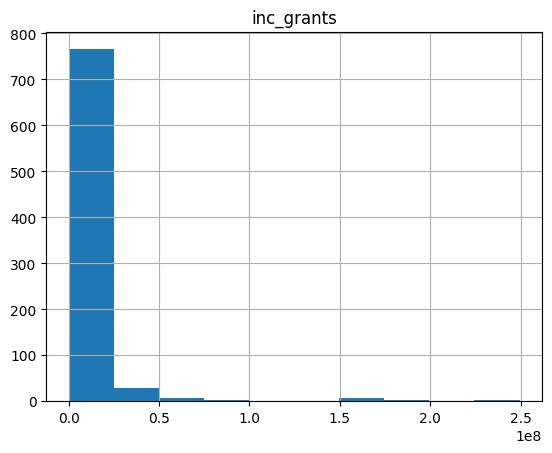

In [26]:
hist = acro.hist(df, "inc_grants")

### ACRO Histogram with suppression

In [27]:
acro.suppress = True
hist = acro.hist(df, "inc_grants")

INFO:acro:status: fail


INFO:acro:records:add(): output_16


<Figure size 640x480 with 0 Axes>

In [28]:
acro.suppress = False

### List current ACRO outputs

In [29]:
results_str = acro.print_outputs()

uid: output_0
status: fail
type: table
properties: {'method': 'crosstab'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 0, 'threshold': 6, 'p-ratio': 0, 'nk-rule': 0}, 'cells': {'negative': [], 'missing': [], 'threshold': [[0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3]], 'p-ratio': [], 'nk-rule': []}}
command: safe_table = acro.crosstab(df.year, df.grant_type)
summary: fail; threshold: 6 cells may need suppressing; 
outcome: grant_type   G   N   R          R/G
year                               
2010        ok  ok  ok  threshold; 
2011        ok  ok  ok  threshold; 
2012        ok  ok  ok  threshold; 
2013        ok  ok  ok  threshold; 
2014        ok  ok  ok  threshold; 
2015        ok  ok  ok  threshold; 
output: [grant_type   G   N   R  R/G
year                       
2010        15  59  71    8
2011        15  59  71    8
2012        15  59  71    8
2013        15  59  71    8
2014        15  59  71    8
2015        15  59  71    8]
timestamp: 2023-10-18T10:45:20

### Remove some ACRO outputs before finalising

In [30]:
acro.remove_output("output_1")
acro.remove_output("output_4")

INFO:acro:records:remove(): output_1 removed
INFO:acro:records:remove(): output_4 removed


### Rename ACRO outputs before finalising

In [31]:
acro.rename_output("output_2", "pivot_table")

INFO:acro:records:rename_output(): output_2 renamed to pivot_table


### Add a comment to output

In [32]:
acro.add_comments("output_0", "This is a cross table between year and grant_type")
acro.add_comments("output_0", "6 cells were suppressed in this table")

INFO:acro:records:a comment was added to output_0
INFO:acro:records:a comment was added to output_0


### Add an unsupported output to the list of outputs

In [33]:
acro.custom_output(
    "XandY.jpeg", "This output is an image showing the relationship between X and Y"
)

INFO:acro:records:add_custom(): output_17


### Request an exception for some of the outputs

In [34]:
acro.add_exception("output_0", "I really need this.")
acro.add_exception("output_3", "This one is safe. Trust me, I'm a professor.")
acro.add_exception("output_5", "It's not disclosive, I promise.")
acro.add_exception("output_6", "I need this one too")

INFO:acro:records:exception request was added to output_0
INFO:acro:records:exception request was added to output_3
INFO:acro:records:exception request was added to output_5
INFO:acro:records:exception request was added to output_6


### Finalise ACRO

In [35]:
SAVE_PATH = "ACRO_RES"

# output = acro.finalise(SAVE_PATH, "xlsx")
output = acro.finalise(SAVE_PATH, "json")

INFO:acro:records:
uid: output_7
status: review
type: table
properties: {'method': 'pivot_table'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 11, 'threshold': 7, 'p-ratio': 2, 'nk-rule': 1}, 'cells': {'negative': [], 'missing': [[0, 0], [0, 5], [1, 0], [1, 1], [1, 5], [2, 0], [2, 1], [2, 2], [2, 4], [2, 5], [3, 0]], 'threshold': [[1, 0], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5]], 'p-ratio': [[1, 0], [3, 0]], 'nk-rule': [[3, 0]]}}
command: table = acro.pivot_table(
summary: review; missing values found
outcome:            inc_grants                                             
year             2010     2011     2012 2013     2014     2015 All
grant_type                                                        
G             missing                                  missing    
N             missing  missing                         missing    
R             missing  missing  missing       missing  missing    
R/G           missing                                  

INFO:acro:records:
uid: output_8
status: review
type: table
properties: {'method': 'pivot_table'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 8, 'threshold': 0, 'p-ratio': 0, 'nk-rule': 0}, 'cells': {'negative': [], 'missing': [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1]], 'threshold': [], 'p-ratio': [], 'nk-rule': []}}
command: table = acro.pivot_table(
summary: review; missing values found
outcome:                  mean        std
           inc_grants inc_grants
grant_type                      
G             missing    missing
N             missing    missing
R             missing    missing
R/G           missing    missing
output: [                    mean           std
              inc_grants    inc_grants
grant_type                            
G           1.141279e+07  2.283220e+07
N           1.344319e+05  1.988737e+05
R           8.098502e+06  3.204495e+07
R/G         1.664827e+07  1.583532e+07]
timestamp: 2023-10-18T10:45:21.682294
comm

### List files generated

In [36]:
files = []
for name in os.listdir(SAVE_PATH):
    if os.path.isfile(os.path.join(SAVE_PATH, name)):
        files.append(name)
files.sort()
for f in files:
    print(f)

XandY.jpeg
config.json
histogram_0.png
histogram_1.png
output_0_0.csv
output_10_0.csv
output_11_0.csv
output_11_1.csv
output_11_2.csv
output_12_0.csv
output_12_1.csv
output_12_2.csv
output_13_0.csv
output_13_1.csv
output_14_0.csv
output_14_1.csv
output_3_0.csv
output_5_0.csv
output_6_0.csv
output_7_0.csv
output_8_0.csv
output_9_0.csv
pivot_table_0.csv
results.json


### Checksums

In [37]:
files = []
checksum_dir = os.path.join(SAVE_PATH, "checksums")
for name in os.listdir(checksum_dir):
    if os.path.isfile(os.path.join(checksum_dir, name)):
        files.append(name)
files.sort()
for f in files:
    print(f)

XandY.jpeg.txt
config.json.txt
histogram_0.png.txt
histogram_1.png.txt
output_0_0.csv.txt
output_10_0.csv.txt
output_11_0.csv.txt
output_11_1.csv.txt
output_11_2.csv.txt
output_12_0.csv.txt
output_12_1.csv.txt
output_12_2.csv.txt
output_13_0.csv.txt
output_13_1.csv.txt
output_14_0.csv.txt
output_14_1.csv.txt
output_3_0.csv.txt
output_5_0.csv.txt
output_6_0.csv.txt
output_7_0.csv.txt
output_8_0.csv.txt
output_9_0.csv.txt
pivot_table_0.csv.txt
results.json.txt
